# Mise en situation :
Nous sommes dans le contexte ou l'on a une population de 50 000 hommes de taille comprise entre [54;175] centimètres qui habite la ville A et de taille comprise entre ]175;272] qui habite la ville B

# Objectif :
Créer un réseau de neurones qui est en capacité de comprendre ce phénomène en classant correctement les habitants en fonction
de leur taille. Notre modèle devra analyser les données pour faire le lien entre la taille et le lieu d'habitation 
chose dont il n'a pas connaissance à son initialisation 

In [12]:
# import des librairies, dans le cadre de ce projet on se basera sur tensorflow 
import tensorflow
import seaborn as sns
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# PARTIE 1 : 

# Mise en place du jeu de données 

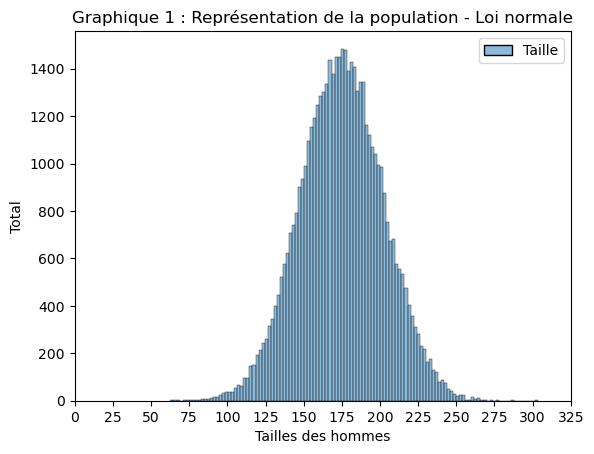

In [13]:
# La taille moyenne des hommes est de 175cm, à l'aide de la loi normale on va reproduire une population conforme à ce qui 
# pourrait exister dans le monde réel
mu, sigma = 175, (272-54)/8 # mu = moyenne / sigma = écart type -> pour simplifier on le calcul de manière empirique
# en nous n'avons pas de données donc le calcul de l'écart-type ne peut que se déduire
simu_norm = np.random.normal(mu,sigma,50000) 
loiNormalRes = pd.DataFrame(simu_norm,columns=['Taille'])
sns.histplot(loiNormalRes)
plt.title('Graphique 1 : Représentation de la population - Loi normale')
plt.xlabel('Tailles des hommes')
plt.ylabel('Total')
plt.xticks(range(0, 350, 25)) # ici j'ai choisi 350 = 175 * 2 pour avoir centre graphiquement ma loi normale
plt.show()

Dans le graphique 1 on se rends compte que la distribution possède + de valeur de grand que de petit ... 
En effet on a un écart plus important entre 175-54=121 cm d'écart entre le + petit et la norme 
et 272-175cm d'écart entre le + grand et la norme ce qui explique une répartition plus importante chez les grands 

In [14]:
loiNormalRes.describe()

,Taille
count,50000.000000
mean,174.978690
std,27.245272
min,62.670764
25%,156.501185
50%,174.921304
75%,193.367139
max,303.662384


On remarque qu'il y a des données qui dépassent le seuil que nous avions fixé dans notre mise en situation.
Ainsi nous allons donc devoir procéder à un nettoyage des données 

# Nettoyage du jeu de données 

In [15]:
df_filtre = loiNormalRes.loc[(loiNormalRes['Taille'] <= 272) & (loiNormalRes['Taille'] >= 54)]
df_filtre.describe()

,Taille
count,49995.000000
mean,174.967653
std,27.224062
min,62.670764
25%,156.499234
50%,174.916789
75%,193.363768
max,269.271344


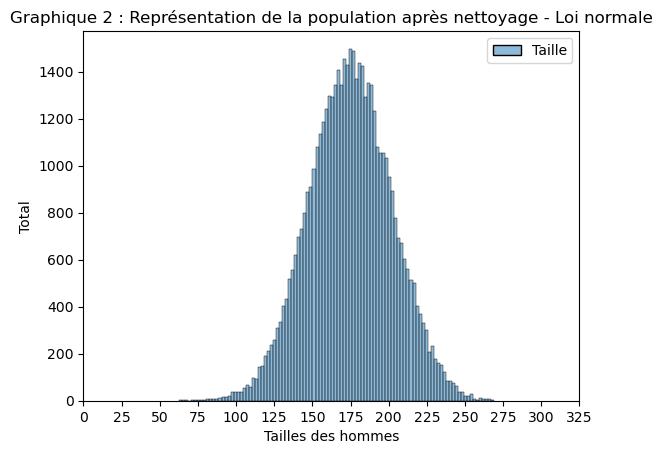

In [16]:
sns.histplot(df_filtre)
plt.title('Graphique 2 : Représentation de la population après nettoyage - Loi normale')
plt.xlabel('Tailles des hommes')
plt.ylabel('Total')
plt.xticks(range(0, 350, 25)) # ici j'ai choisi 350 = 175 * 2 pour centrer graphiquement ma loi normale
plt.show()

Maintenant on va chercher à labeliser nos données. Soit "Ville A : 0" et "Ville B : 1".

In [17]:
# Df avant modification
df_filtre.head()

,Taille
0,192.505294
1,202.615278
2,168.543637
3,215.179078
4,216.099327


In [20]:
df_filtre.loc[df_filtre["Taille"]<=175,'Label'] = 0 # ville A
df_filtre.loc[df_filtre["Taille"]>175,'Label'] = 1 # ville B

In [22]:
# df après modification
df_filtre.tail()

,Taille,Label
49995,163.211664,0.0
49996,186.707449,1.0
49997,128.659691,0.0
49998,198.360854,1.0
49999,158.161636,0.0
